In [1]:
import yasa
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt
from scipy.signal import decimate
import mne
import os
import glob

In [2]:
from initial_processes import *

In [3]:
def electrode_combinations(montage_name, neighbors_dist, long_distance, n_elect = 32):
  montage = mne.channels.read_custom_montage(montage_name)
  electrode_names = montage.ch_names[0:n_elect]
  electrode_pos = np.zeros((32,2))
  for i in np.arange(32):
    electrode_pos[i] = montage.dig[i+3].get('r')[0:2].round(3)*50 # in mm

  distances_btw_electrodes = spatial.distance.pdist(electrode_pos, 'euclidean')

  nums = np.linspace(0, n_elect-1, n_elect, dtype = int)

  comb = combinations(nums, 2)
  # working with the combination element is difficult and it can only be assigned once -> it is transformed into a list
  comb_long_distance = list(comb)

  comb = combinations(nums, 2)
  comb_short_distance = list(comb)

  # indexes for the elements to delete
  indexes_to_delete_in_short_distance = []
  indexes_to_delete_in_long_distance = []

  nei = 0
  s_d = 0
  l_d = 0

  for i in range(len(distances_btw_electrodes)):
      if distances_btw_electrodes[i] <= neighbors_dist:
          indexes_to_delete_in_long_distance.append(i)
          indexes_to_delete_in_short_distance.append(i)
          nei += 1
      elif distances_btw_electrodes[i] <long_distance:
          indexes_to_delete_in_long_distance.append(i)
          s_d += 1
      else:
          indexes_to_delete_in_short_distance.append(i)
          l_d += 1

  long_dist_electrodes = np.delete(distances_btw_electrodes, indexes_to_delete_in_long_distance)
  short_dist_electrodes = np.delete(distances_btw_electrodes, indexes_to_delete_in_short_distance)

  # when it deletes an element, it is necessary to update the indexes substracting one to the total of them the list has.
  indexes_already_del = 0
  for i in range(len(indexes_to_delete_in_long_distance)):
      del comb_long_distance[indexes_to_delete_in_long_distance[i] - indexes_already_del]
      indexes_already_del += 1

  indexes_already_del = 0
  for i in range(len(indexes_to_delete_in_short_distance)):
      del comb_short_distance[indexes_to_delete_in_short_distance[i] - indexes_already_del]
      indexes_already_del += 1

  return comb_short_distance, comb_long_distance

In [4]:
ko_folder = '/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM'
wt_folder = '/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM'

In [5]:
montage_name = '/media/jorge/otherprojects/Code/MNE_Alfredo/standard_32grid_Alfredo.elc'
n_electrodes = 32
neighbors_dist = 0.5
long_distance = 2

prm.set_sampling_rate(1000)
sr=prm.get_sampling_rate()
downsampling = 8
brain_state = 1 # NonREM
real_sr = sr/downsampling

### Get the files and folders to analyse

In [6]:
l_npy_files_KO = []
l_npy_files_WT = []

# dividing files by animal (KO)
os.chdir(ko_folder)
d = os.getcwd() + '/'
matching_files = glob.glob(r'*npy')
for matching_file in matching_files:
    l_npy_files_KO.append(d+matching_file)
    

# dividing files by animal (WT)
os.chdir(wt_folder)
d = os.getcwd() + '/'
matching_files = glob.glob(r'*npy')
for matching_file in matching_files:
    l_npy_files_WT.append(d+matching_file)

### Calculating the combinations for short and long distance

In [7]:
short_d_comb, long_d_comb = electrode_combinations(montage_name, neighbors_dist, long_distance, n_electrodes)

In [8]:
len(short_d_comb)

112

In [9]:
short_d_comb

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 6),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 12),
 (1, 3),
 (1, 4),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 11),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 8),
 (2, 10),
 (2, 29),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 26),
 (6, 7),
 (8, 9),
 (8, 10),
 (8, 13),
 (8, 23),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (10, 12),
 (10, 13),
 (10, 15),
 (10, 21),
 (11, 12),
 (11, 13),
 (11, 14),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 14),
 (13, 15),
 (13, 18),
 (14, 15),
 (15, 16),
 (16, 17),
 (16, 18),
 (16, 19),
 (16, 21),
 (17, 18),
 (17, 19),
 (17, 20),
 (17, 22),
 (18, 19),
 (18, 20),
 (18, 21),
 (18, 22),
 (18, 23),
 (19, 20),
 (19, 21),
 (19, 22),
 (19, 31),
 (20, 22),
 (20, 30),
 (21, 22),
 (21, 23),
 (21, 29),
 (21, 31),
 (22, 23),
 (22, 28),
 (22, 30),
 (22, 31),
 (23, 26),
 (23, 28),
 (23, 29),
 (23, 30),
 (23, 31),
 (24, 25),
 (24, 26),
 (24, 27),
 (24, 28),
 (24, 30),
 (25, 26),
 (25, 2

In [10]:
len(long_d_comb)

384

### Calculate the spindles happening together when comparing combinations of electrodes at a short or long distance. Changes from the default. We are looking for coincidences of spindles with frequencies from 13-17 Hz with a center in 15 Hz.

In [11]:
list_sp_multi_WT = []
list_sp_WT = []
total_samples_WT = []
total_seconds_WT = []
sp_per_recording_WT = []
for i, npy_file in enumerate(l_npy_files_WT):
    # First extract data for the recording (which should be just for the NonREM state)
    raw_data = npy32mne(npy_file, montage_name, real_sr)
    total_samples_WT.append(raw_data.n_times)
    total_seconds_WT.append(raw_data.n_times/(sr/downsampling))
    # Go through all the combinations on that recording
    # Short distances
    sp_short_WT = []
    for i in list(short_d_comb): 
        data = np.vstack((raw_data._data[i[0]], raw_data._data[i[1]]))
        names = [raw_data.ch_names[i[0]],raw_data.ch_names[i[1]]]
        sp = yasa.spindles_detect(data, sf = sr/downsampling, ch_names = names, freq_sp=(13,17), multi_only=True, remove_outliers=True)
        sp_short_WT.append(sp)
        
    sp_per_recording_WT.append(list(filter(None, sp_short_WT))) # there are some sp that are empty
    # Long distance
    print('recording done:')
    print(npy_file)

Creating RawArray with float64 data, n_channels=35, n_times=110000
    Range : 0 ... 109999 =      0.000 ...   879.992 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7018_D5_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=213125
    Range : 0 ... 213124 =      0.000 ...  1704.992 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7018_D6_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=265008
    Range : 0 ... 265007 =      0.000 ...  2120.056 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7021_D6_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=216108
    Range : 0 ... 216107 =      0.000 ...  1728.856 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7023_D6_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=17125
    Range : 0 ... 

10-Jun-21 07:40:59 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:40:59 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:40:59 | WARNING | No spindle were found in channel S1Tr_LEFT.
1

10-Jun-21 07:41:01 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel M1_post_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel M2_ant_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel M2_post_RIGHT.
10-Jun-21 07:41:01 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:01 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:41:01 | WARNING | No spindle were found in 

10-Jun-21 07:41:02 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel M2_ant_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel M2_post_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel M1_ant_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel S1FL_S1DZ_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel M1_ant_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel M1_post_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:02 | WARNING | No spindle were found in channel M1_ant_RIGHT.
10-Jun-21 07:41:02 | WARNING | No spindle were found

10-Jun-21 07:41:03 | WARNING | No spindle were found in channel S1DZ_S1Bf_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel V2L_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel S1Tr_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel S1DZ_S1Bf_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:41:03 | WARNING | No spindle were found in channel

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7026_D2-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=84133
    Range : 0 ... 84132 =      0.000 ...   673.056 secs
Ready.


10-Jun-21 07:41:04 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:04 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:41:06 | WARNING | No spindle were found in channel V2

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7026_D2-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=149905
    Range : 0 ... 149904 =      0.000 ...  1199.232 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7026_D3_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=175000
    Range : 0 ... 174999 =      0.000 ...  1399.992 secs
Ready.


10-Jun-21 07:41:52 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:41:54 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:41:56 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:41:56 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:41:57 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:41:57 | WARNING | No spindle were found in channel V2MM_LEFT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7030_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=67499
    Range : 0 ... 67498 =      0.000 ...   539.984 secs
Ready.


10-Jun-21 07:42:26 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:28 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:28 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:28 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:28 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:28 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:28 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:42:29 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7031_D2-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=97254
    Range : 0 ... 97253 =      0.000 ...   778.024 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7031_D2-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=71878
    Range : 0 ... 71877 =      0.000 ...   575.016 secs
Ready.


10-Jun-21 07:42:58 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:42:59 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:43:00 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:43:00 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:43:01 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:43:01 | WARNING | No spindle were found in channel V1M_LEFT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7032_D2-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=132123
    Range : 0 ... 132122 =      0.000 ...  1056.976 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7032_D2-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=212151
    Range : 0 ... 212150 =      0.000 ...  1697.200 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7034_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=5625
    Range : 0 ... 5624 =      0.000 ...    44.992 secs
Ready.


10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel S1FL_S1DZ_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:44:14 | WARNING | No spindle were found in channel V2L_LEFT.
10-Ju

10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M1_ant_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M1_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M1_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M2_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M1_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M1_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M2_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in channel M2_post_RIGHT.
10-Jun-21 07:44:15 | WARNING | No spindle were found in

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7034_D3-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=99707
    Range : 0 ... 99706 =      0.000 ...   797.648 secs
Ready.


10-Jun-21 07:44:16 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:17 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:44:17 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:18 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:19 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:44:19 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:44:19 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:44:19 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:20 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:20 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:44:20 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:44:20 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:44:20 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:44:20 

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7034_D3-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=214368
    Range : 0 ... 214367 =      0.000 ...  1714.936 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7036_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=68602
    Range : 0 ... 68601 =      0.000 ...   548.808 secs
Ready.


10-Jun-21 07:45:13 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:14 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:15 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:16 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:16 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:17 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:17 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:17 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:45:17 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7036_D3-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=164651
    Range : 0 ... 164650 =      0.000 ...  1317.200 secs
Ready.


10-Jun-21 07:45:28 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:45:32 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:45:33 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:45:34 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:45:34 | WARNING | No spindle were found in channel V2L_V1B_LEFT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7036_D3-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=164941
    Range : 0 ... 164940 =      0.000 ...  1319.520 secs
Ready.


10-Jun-21 07:45:56 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:45:57 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:45:59 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:46:00 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:46:00 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:46:01 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:46:01 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:46:01 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:46:01 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:46:01 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:46:01 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:46:01 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:46:01 | WARNING | No spindle were found in channel V2M

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7039_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=132994
    Range : 0 ... 132993 =      0.000 ...  1063.944 secs
Ready.


10-Jun-21 07:46:27 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:46:27 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:46:28 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:46:29 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:46:30 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:46:30 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:46:31 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:46:31 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:46:31 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:46:32 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:46:32 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:46:32 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:46:32 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:46:32 | WARN

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7040_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=163125
    Range : 0 ... 163124 =      0.000 ...  1304.992 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/WTnumpy/REM/S7041_D2_Down8_rem.npy


#### recordings for the same animal need to be put together for doing statistical analysis

In [12]:
sp_per_animal_WT = []
files_per_animal_WT = []
seconds_animal_WT = []
sp_per_animal_WT.append(sp_per_recording_WT[1] + sp_per_recording_WT[2])
files_per_animal_WT.append(l_npy_files_WT[1] + l_npy_files_WT[2])
seconds_animal_WT.append(total_seconds_WT[1] + total_seconds_WT[2])
sp_per_animal_WT.append(sp_per_recording_WT[3])
files_per_animal_WT.append(l_npy_files_WT[3])
seconds_animal_WT.append(total_seconds_WT[3])
sp_per_animal_WT.append(sp_per_recording_WT[4])
files_per_animal_WT.append(l_npy_files_WT[4])
seconds_animal_WT.append(total_seconds_WT[4])
sp_per_animal_WT.append(sp_per_recording_WT[5] + sp_per_recording_WT[6] + sp_per_recording_WT[7])
files_per_animal_WT.append(l_npy_files_WT[5] + l_npy_files_WT[6] + l_npy_files_WT[7])
seconds_animal_WT.append(total_seconds_WT[5] + total_seconds_WT[6] + total_seconds_WT[7])
sp_per_animal_WT.append(sp_per_recording_WT[8])
files_per_animal_WT.append(l_npy_files_WT[8])
seconds_animal_WT.append(total_seconds_WT[8])
sp_per_animal_WT.append(sp_per_recording_WT[0] + sp_per_recording_WT[9])
files_per_animal_WT.append(l_npy_files_WT[0] + l_npy_files_WT[9])
seconds_animal_WT.append(total_seconds_WT[0] + total_seconds_WT[9])
sp_per_animal_WT.append(sp_per_recording_WT[10] + sp_per_recording_WT[11])
files_per_animal_WT.append(l_npy_files_WT[10] + l_npy_files_WT[11])
seconds_animal_WT.append(total_seconds_WT[10] + total_seconds_WT[11])
sp_per_animal_WT.append(sp_per_recording_WT[12] + sp_per_recording_WT[13] + sp_per_recording_WT[14])
files_per_animal_WT.append(l_npy_files_WT[12] + l_npy_files_WT[13] + l_npy_files_WT[14])
seconds_animal_WT.append(total_seconds_WT[12] + total_seconds_WT[13] + total_seconds_WT[14])
sp_per_animal_WT.append(sp_per_recording_WT[15] + sp_per_recording_WT[16] + sp_per_recording_WT[17])
files_per_animal_WT.append(l_npy_files_WT[15] + l_npy_files_WT[16] + l_npy_files_WT[17])
seconds_animal_WT.append(total_seconds_WT[15] + total_seconds_WT[16] + total_seconds_WT[17])
sp_per_animal_WT.append(sp_per_recording_WT[18])
files_per_animal_WT.append(l_npy_files_WT[18])
seconds_animal_WT.append(total_seconds_WT[18])
sp_per_animal_WT.append(sp_per_recording_WT[19])
files_per_animal_WT.append(l_npy_files_WT[19])
seconds_animal_WT.append(total_seconds_WT[19])
sp_per_animal_WT.append(sp_per_recording_WT[20])
files_per_animal_WT.append(l_npy_files_WT[20])
seconds_animal_WT.append(total_seconds_WT[19])

In [13]:
total_sp_animal_WT = []
comb_sp_WT = []
for record_sp in sp_per_animal_WT:
    total_record_sp = 0
    for sp_combination in record_sp:
        total_record_sp = total_record_sp + sp_combination.summary().shape[0]
        comb_sp_WT.append(sp_combination.summary().shape[0])
    
    total_sp_animal_WT.append(total_record_sp) # list with the amount of spindles per recording

total_twospindles_WT = sum(total_sp_animal_WT)
print('Total number of spindles in short distances in WT animals: ', total_twospindles_WT)

Total number of spindles in short distances in WT animals:  20145


In [14]:
total_twospindles_WT/len(sp_per_animal_WT) # spindles per animal

1678.75

In [15]:
total_twospindles_WT/sum(total_seconds_WT) # spindles per second

0.8912700924000876

In [16]:
sum(total_seconds_WT)/3600 # Total hours

6.278493333333333

In [17]:
sp_second_animal_WT = [b/m for b,m in zip(total_sp_animal_WT, seconds_animal_WT)] # spindles per second per recording

### The same for KO

In [18]:
list_sp_multi_KO = []
list_sp_KO = []
total_samples_KO = []
total_seconds_KO = []
sp_per_recording_KO = []
for i, npy_file in enumerate(l_npy_files_KO):
    # First extract data for the recording (which should be just for the NonREM state)
    raw_data = npy32mne(npy_file, montage_name, real_sr)
    total_samples_KO.append(raw_data.n_times)
    total_seconds_KO.append(raw_data.n_times/(sr/downsampling))
    # Go through all the combinations on that recording
    # Short distances
    sp_short_KO = []
    for i in list(short_d_comb): 
        data = np.vstack((raw_data._data[i[0]], raw_data._data[i[1]]))
        names = [raw_data.ch_names[i[0]],raw_data.ch_names[i[1]]]
        sp = yasa.spindles_detect(data, sf = sr/downsampling, ch_names = names, freq_sp=(13,17), multi_only=True, remove_outliers=True)
        sp_short_KO.append(sp)
    
    sp_per_recording_KO.append(list(filter(None, sp_short_KO))) # there are some sp that are empty
    # Long distance. do not do it for now, it would take too long
    print('recording done:')
    print(npy_file)

Creating RawArray with float64 data, n_channels=35, n_times=242012
    Range : 0 ... 242011 =      0.000 ...  1936.088 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7017_D5_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=338576
    Range : 0 ... 338575 =      0.000 ...  2708.600 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7017_D6_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=219998
    Range : 0 ... 219997 =      0.000 ...  1759.976 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7019_D5_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=91875
    Range : 0 ... 91874 =      0.000 ...   734.992 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7020_D5_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_time

10-Jun-21 07:51:20 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:51:20 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:51:20 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:51:21 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:51:21 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:51:21 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:51:21 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:51:21 | WARNING | No spindle were found in channel V2MM_RIGHT.
10-Jun-21 07:51:21 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:51:23 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:51:24 | WARNING | No spindle were found in channel V2MM_RIGHT.
10-Jun-21 07:51:24 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:51:24 | WARNING | No spindle were found in channel V2L_V1B_RIGHT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7025_D2-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=171846
    Range : 0 ... 171845 =      0.000 ...  1374.760 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7025_D2-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=20625
    Range : 0 ... 20624 =      0.000 ...   164.992 secs
Ready.


10-Jun-21 07:52:02 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:02 | WARNING | No spindles were found in data. Returning None.
1

10-Jun-21 07:52:04 | WARNING | No spindle were found in channel M1_ant_LEFT.
10-Jun-21 07:52:04 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:04 | WARNING | No spindle were found in channel M1_post_LEFT.
10-Jun-21 07:52:04 | WARNING | No spindle were found in channel M1_post_LEFT.
10-Jun-21 07:52:04 | WARNING | No spindle were found in channel M2_FrA_LEFT.
10-Jun-21 07:52:04 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:04 | WARNING | No spindle were found in channel M1_post_LEFT.
10-Jun-21 07:52:04 | WARNING | No spindle were found in channel S1FL_S1DZ_LEFT.
10-Jun-21 07:52:05 | WARNING | No spindle were found in channel M1_ant_LEFT.
10-Jun-21 07:52:05 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:05 | WARNING | No spindle were found in channel S1FL_S1DZ_LEFT.
10-Jun-21 07:52:05 | WARNING | No spindle were found in channel S1FL_S1DZ_LEFT.
10-Jun-21 07:52:05 | WARNING | No spindle were found in ch

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7027_D2-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=58125
    Range : 0 ... 58124 =      0.000 ...   464.992 secs
Ready.


10-Jun-21 07:52:08 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:52:08 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:08 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:52:08 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:08 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:52:08 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:52:09 | WARNING | No spindle were found in channel V2ML_LEFT.
1

10-Jun-21 07:52:18 | WARNING | No spindle were found in channel V1M_RIGHT.
10-Jun-21 07:52:18 | WARNING | No spindle were found in channel V2L_RIGHT.
10-Jun-21 07:52:18 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V1M_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V1M_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V1M_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V2MM_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:52:19 | WARNING | No spindles were found in data. Returning None.
1

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7027_D2-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=110920
    Range : 0 ... 110919 =      0.000 ...   887.352 secs
Ready.


10-Jun-21 07:52:21 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:24 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:25 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:25 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:26 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:26 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:27 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:37 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:38 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:40 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:41 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:41 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:42 | WARNING | No spindle were found in channel V2MM_RSA_RIG

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7027_D3_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=199990
    Range : 0 ... 199989 =      0.000 ...  1599.912 secs
Ready.


10-Jun-21 07:52:44 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:45 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:47 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:49 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:50 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:52:50 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:51 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:52:51 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:52 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:52 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:52:52 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:52:52 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:52:52 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:52:52 

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7028_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=168670
    Range : 0 ... 168669 =      0.000 ...  1349.352 secs
Ready.


10-Jun-21 07:53:26 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:53:30 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:53:30 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:53:32 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:53:32 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:53:33 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:53:34 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:53:34 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:53:34 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:53:34 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:53:34 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:53:35 | WARNING | No spindle were found in channel V2MM_LEFT.
10-Jun-21 07:53:35 | WARNING | No spindle were found in channel V2MM_RIGHT.
10-Jun-21 07:53:35 | WARN

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7028_D3_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=192953
    Range : 0 ... 192952 =      0.000 ...  1543.616 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7029_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=140442
    Range : 0 ... 140441 =      0.000 ...  1123.528 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7029_D3_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=214314
    Range : 0 ... 214313 =      0.000 ...  1714.504 secs
Ready.


10-Jun-21 07:55:33 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:55:38 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:55:39 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:55:41 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:55:42 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:55:43 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:55:45 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:03 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:56:05 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:56:06 | WARNING | No spindle were found in channel V2ML_RIGHT.
10-Jun-21 07:56:07 | WARNING | No spindle were found in channel V2MM_RSA_RIGHT.
10-Jun-21 07:56:08 | WARNING | No spindle were found in channel V2L_V1B_RIGHT.
10-Jun-21 07:56:08 | WARNING | No spindle were found in channel V2L_V1B_RIGHT.
10-Jun

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7033_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=7949
    Range : 0 ... 7948 =      0.000 ...    63.584 secs
Ready.


10-Jun-21 07:56:16 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel S1Tr_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 07:56:16 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:16 | WARNING | No spindle were found in channel S1Tr_LEFT.
1

10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M1_post_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M2_ant_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M2_post_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M2_post_RIGHT.
10-Jun-21 07:56:17 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindle were found in channel M1_post_LEFT.
10-Jun-21 07:56:17 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:17 | WARNING | No spindle were found in ch

10-Jun-21 07:56:18 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel M1_ant_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel M1_ant_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel S1Tr_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel S1FL_S1DZ_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel S1FL_S1DZ_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindle were found in channel M1_post_RIGHT.
10-Jun-21 07:56:18 | WARNING | No spindle were fo

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7033_D3-A_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=156088
    Range : 0 ... 156087 =      0.000 ...  1248.696 secs
Ready.


10-Jun-21 07:56:21 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:25 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:27 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:28 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:28 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:29 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 07:56:39 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:40 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:41 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:42 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:43 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:44 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:56:44 | WARNING | No spindle were found in channel S1HL_S

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7033_D3-B_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=175651
    Range : 0 ... 175650 =      0.000 ...  1405.200 secs
Ready.


10-Jun-21 07:57:15 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:17 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:18 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:19 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:19 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:20 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:21 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:21 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.
10-Jun-21 07:57:21 | WARNING | No spindle were found in channel S1HL_S1FL_RIGHT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7035_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=208746
    Range : 0 ... 208745 =      0.000 ...  1669.960 secs
Ready.


10-Jun-21 07:57:35 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:57:41 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:57:42 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:57:43 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 07:57:44 | WARNING | No spindle were found in channel V2L_V1B_LEFT.


recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7035_D3_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=258183
    Range : 0 ... 258182 =      0.000 ...  2065.456 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7037_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=305207
    Range : 0 ... 305206 =      0.000 ...  2441.648 secs
Ready.
recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7037_D3_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=99375
    Range : 0 ... 99374 =      0.000 ...   794.992 secs
Ready.


10-Jun-21 08:00:11 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:11 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 08:00:12 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 08:00:12 | WARNING | No spindle were found in channel V1M_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindle were found in channel V2ML_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 08:00:13 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 08:00:13 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindle were found in channel V2L_V1B_LEFT.
10-Jun-21 08:00:13 | WARNING | No spindles were found in data. Returning

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7038_D2_Down8_rem.npy
Creating RawArray with float64 data, n_channels=35, n_times=173620
    Range : 0 ... 173619 =      0.000 ...  1388.952 secs
Ready.


10-Jun-21 08:00:29 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:30 | WARNING | No spindle were found in channel V2MM_RSA_LEFT.
10-Jun-21 08:00:30 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 08:00:31 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 08:00:32 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:32 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:32 | WARNING | No spindle were found in channel V2L_LEFT.
10-Jun-21 08:00:32 | WARNING | No spindles were found in data. Returning None.
10-Jun-21 08:00:32 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:33 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:33 | WARNING | No spindle were found in channel S1DZ_S1Bf_LEFT.
10-Jun-21 08:00:33 | WARNING | No spindle were found in channel S1HL_S1FL_LEFT.
10-Jun-21 08:00:33 | WARNING | No spindles were found 

recording done:
/media/jorge/otherprojects/Data/Alfredo/Syngap/KOnumpy/KOnumpyREM/S7038_D3_Down8_rem.npy


In [19]:
sp_per_animal_KO = []
files_per_animal_KO = []
seconds_animal_KO = []
sp_per_animal_KO.append(sp_per_recording_KO[1] + sp_per_recording_KO[2])
files_per_animal_KO.append(l_npy_files_KO[1] + l_npy_files_KO[2])
seconds_animal_KO.append(total_seconds_KO[1] + total_seconds_KO[2])
sp_per_animal_KO.append(sp_per_recording_KO[3])
files_per_animal_KO.append(l_npy_files_KO[3])
seconds_animal_KO.append(total_seconds_KO[3])
sp_per_animal_KO.append(sp_per_recording_KO[4])
files_per_animal_KO.append(l_npy_files_KO[4])
seconds_animal_KO.append(total_seconds_KO[4])
sp_per_animal_KO.append(sp_per_recording_KO[5] + sp_per_recording_KO[6])
files_per_animal_KO.append(l_npy_files_KO[5] + l_npy_files_KO[6])
seconds_animal_KO.append(total_seconds_KO[5] + total_seconds_KO[6])
sp_per_animal_KO.append(sp_per_recording_KO[7] + sp_per_recording_KO[8])
files_per_animal_KO.append(l_npy_files_KO[7] + l_npy_files_KO[8])
seconds_animal_KO.append(total_seconds_KO[7] + total_seconds_KO[8])
sp_per_animal_KO.append(sp_per_recording_KO[0] + sp_per_recording_KO[9] + sp_per_recording_KO[10])
files_per_animal_KO.append(l_npy_files_KO[0] + l_npy_files_KO[9] + l_npy_files_KO[10])
seconds_animal_KO.append(total_seconds_KO[0] + total_seconds_KO[9]  + total_seconds_KO[10])
sp_per_animal_KO.append(sp_per_recording_KO[11] + sp_per_recording_KO[12])
files_per_animal_KO.append(l_npy_files_KO[11] + l_npy_files_KO[12])
seconds_animal_KO.append(total_seconds_KO[11] + total_seconds_KO[12])
sp_per_animal_KO.append(sp_per_recording_KO[13] + sp_per_recording_KO[14])
files_per_animal_KO.append(l_npy_files_KO[13] + l_npy_files_KO[14])
seconds_animal_KO.append(total_seconds_KO[13] + total_seconds_KO[14])
sp_per_animal_KO.append(sp_per_recording_KO[15] + sp_per_recording_KO[16] + sp_per_recording_KO[17])
files_per_animal_KO.append(l_npy_files_KO[15] + l_npy_files_KO[16] + l_npy_files_KO[17])
seconds_animal_KO.append(total_seconds_KO[15] + total_seconds_KO[16]  + total_seconds_KO[17])
sp_per_animal_KO.append(sp_per_recording_KO[18] + sp_per_recording_KO[19])
files_per_animal_KO.append(l_npy_files_KO[18] + l_npy_files_KO[19])
seconds_animal_KO.append(total_seconds_KO[18] + total_seconds_KO[19])
sp_per_animal_KO.append(sp_per_recording_KO[20] + sp_per_recording_KO[21])
files_per_animal_KO.append(l_npy_files_KO[20] + l_npy_files_KO[21])
seconds_animal_KO.append(total_seconds_KO[20] + total_seconds_KO[21])
sp_per_animal_KO.append(sp_per_recording_KO[22] + sp_per_recording_KO[23])
files_per_animal_KO.append(l_npy_files_KO[22] + l_npy_files_KO[23])
seconds_animal_KO.append(total_seconds_KO[22] + total_seconds_KO[23])

In [20]:
total_sp_animal_KO = []
comb_sp_KO = []
for record_sp in sp_per_animal_KO:
    total_record_sp = 0
    for sp_combination in record_sp:
        total_record_sp = total_record_sp + sp_combination.summary().shape[0]
        comb_sp_KO.append(sp_combination.summary().shape[0])
    
    total_sp_animal_KO.append(total_record_sp) # list with the amount of spindles per recording

total_twospindles_KO = sum(total_sp_animal_KO)
print('Total number of spindles in short distances in KO animals: ', total_twospindles_KO)

Total number of spindles in short distances in KO animals:  39273


In [21]:
total_sp_animal_KO

[5944, 3456, 1434, 1859, 2578, 3305, 1372, 10996, 1192, 1679, 4887, 571]

In [22]:
total_twospindles_KO/len(sp_per_animal_KO) # spindles per animal

3272.75

In [23]:
total_twospindles_KO/sum(total_seconds_KO) # spindles per second

1.2650153941933948

In [24]:
sum(total_seconds_KO)/3600 # Total hours

8.623742222222223

In [25]:
sp_second_animal_KO = [b/m for b,m in zip(total_sp_animal_KO, seconds_animal_KO)] # spindles per second per recording

In [26]:
sp_second_animal_KO

[1.3301729045748636,
 4.702040816326531,
 1.4024285289561396,
 1.1753622821881085,
 1.6742782029500547,
 1.0050309324497575,
 0.4651982856832855,
 4.122737293600684,
 0.39381420955673435,
 0.5459850102888419,
 1.0842844210937361,
 0.26145167493910143]

Text(0, 0.5, 'spindles per second')

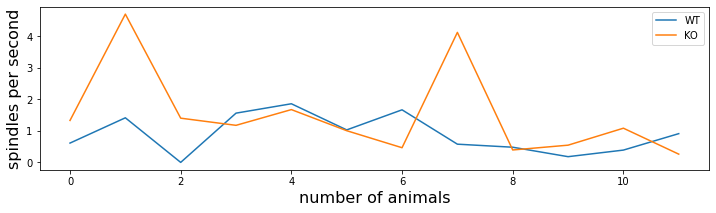

In [27]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(sp_second_animal_WT, label='WT')
ax.plot(sp_second_animal_KO, label='KO')
ax.legend(loc='upper right')
ax.set_xlabel('number of animals', fontsize=16)
ax.set_ylabel('spindles per second', fontsize=16)

In [28]:
from scipy.stats import ttest_ind

In [29]:
statistic, pvalue = ttest_ind(sp_second_animal_WT, sp_second_animal_KO)

In [30]:
pvalue

0.17937051869592724

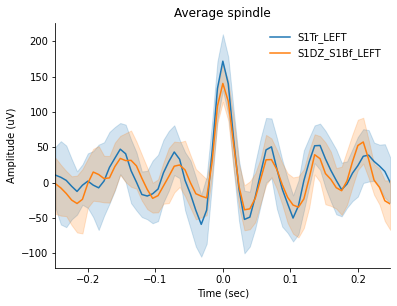

In [31]:
import seaborn as sns
# Plot an average template of the detected spindles, centered around the negative peak
ax = sp_per_animal_KO[0][0].plot_average(time_before=0.25, time_after=0.25)
ax.legend(frameon=False)
sns.despine()

In [69]:
all_KO_sp = []

for i in range(np.shape(sp_per_animal_KO)[0]):
    all_KO_sp = all_KO_sp + sp_per_animal_KO[i]

### Preparing dataframes to export spindles data to excel. First with the KO.

In [32]:
list_KO = []
list_diff_KO = []
for n_animal, animal in enumerate(sp_per_animal_KO):
    for elec_tuple in animal:
        # subtracting the spindles data from one electrode to another
        n2sub = int(len(elec_tuple.summary())/2)
        if n2sub > 0:
        
            first_elec = elec_tuple.summary().head(1)['Channel'].tolist()[0]
            sec_elec = elec_tuple.summary().tail(1)['Channel'].tolist()[0]
        
            # Info about the spindles.
            df_single_sp = elec_tuple.summary().round(2)
            df_single_sp['Electrode_1'] = first_elec
            df_single_sp['Electrode_2'] = sec_elec            
            df_single_sp['Animal'] = n_animal
        
            list_KO.append(df_single_sp)
        
            # Check how different the spindles are when they are detected happening at the same time
            df_one = elec_tuple.summary().round(2).head(n2sub).iloc[:, 0:11]
            df_two = elec_tuple.summary().round(2).tail(n2sub).iloc[:, 0:11]
            df_two.reset_index(drop=True, inplace=True)
            df_diff = df_one.sub(df_two, fill_value=0)

            df_diff['Elec_1'] = first_elec
            df_diff['Elec_2'] = sec_elec
            df_diff['Animal'] = n_animal
        
            list_diff_KO.append(df_diff)

df_all_KO_spindles = pd.concat(list_KO)
df_diff_KO_spindles = pd.concat(list_diff_KO)

In [33]:
# deleting repeated spindles
df_all_KO_spindles = df_all_KO_spindles[df_all_KO_spindles.IdxChannel == 0]

# separating by animal
list_df_KO = []
list_stats_KO = []
list_stats_elec_KO = [] # list of the unique electrodes involved in each spindle cluster
list_stats_num_elec_KO = []
total_group_sp_KO = 0
total_sp_KO = 0
for n_animal, animal in enumerate(sp_per_animal_KO):
    df_for = df_all_KO_spindles[df_all_KO_spindles.Animal == n_animal]
    df_for = df_for.sort_values(by=['Peak', 'Start'])
    # defining the time distance to be in a cluster as 1 sec
    df_for['same_elec'] = df_for['Peak'] - df_for['Peak'].shift(1)     
    # when the time distance is less than 1 sec, write 0. Otherwise, 1
    df_for.fillna(0, inplace=True)
    df_for['int_elec'] = df_for['same_elec'].apply(np.floor)
    condition = [df_for['int_elec'].eq(0.0)]
    choices = [0]
    df_for['points'] = np.select(condition, choices, default=1)
    df_for['num_sp'] = df_for['points'].cumsum()
    df_for.drop(['same_elec','int_elec','points'], axis=1, inplace=True)
    stats_sp = df_for['num_sp'].value_counts().sort_index(ascending=True)
    print('Spindles clusters in animal ', n_animal, ':', df_for['num_sp'].max())
    #print('Average combinations per cluster of spindles: ' , (len(df_for.index)/df_for['num_sp'].max()).round(1))
    total_group_sp_KO = total_group_sp_KO + df_for['num_sp'].max()
    total_sp_KO = total_sp_KO + len(df_for.index)
    list_dif_elec = []
    list_num_dif_elec = []
    #finding the unique electrodes involved in each cluster of spindles
    for i in range(df_for['num_sp'].max()):
        df_comb = df_for.loc[df_for['num_sp'] == i]
        unique_elec = np.unique(df_comb[['Electrode_1', 'Electrode_2']].values)
        list_dif_elec.append(unique_elec)
        list_num_dif_elec.append(len(unique_elec))
    print('Average number of electrodes per cluster :', np.mean(list_num_dif_elec).round(1))
    #print('SE of electrodes per cluster :', sem(list_num_dif_elec).round(1))
    
    list_stats_num_elec_KO.append(list_num_dif_elec)
    list_stats_elec_KO.append(list_dif_elec)  
    list_stats_KO.append(stats_sp)
    list_df_KO.append(df_for)

print('')
print('Clusters of spindles in the short distance REM (KO): ', total_group_sp_KO)
print('Total number of clusters of two spindles KO: ', total_sp_KO)
print('Number of combinations per group', (total_sp_KO/total_group_sp_KO).round(1))
flat_list = [item for sublist in list_stats_num_elec_KO for item in sublist]
print('Number of electrodes per cluster in KO: ', np.mean(flat_list).round(1))
print('Standard Error of electrodes per cluster in KO: ', sem(flat_list).round(1))

Spindles clusters in animal  0 : 143
Average number of electrodes per cluster : 9.0
Spindles clusters in animal  1 : 56
Average number of electrodes per cluster : 11.4
Spindles clusters in animal  2 : 39
Average number of electrodes per cluster : 8.3
Spindles clusters in animal  3 : 64
Average number of electrodes per cluster : 7.2
Spindles clusters in animal  4 : 79
Average number of electrodes per cluster : 7.5
Spindles clusters in animal  5 : 91
Average number of electrodes per cluster : 8.0
Spindles clusters in animal  6 : 50
Average number of electrodes per cluster : 6.8
Spindles clusters in animal  7 : 156
Average number of electrodes per cluster : 13.3
Spindles clusters in animal  8 : 52
Average number of electrodes per cluster : 5.8
Spindles clusters in animal  9 : 64
Average number of electrodes per cluster : 6.5
Spindles clusters in animal  10 : 160
Average number of electrodes per cluster : 7.5
Spindles clusters in animal  11 : 21
Average number of electrodes per cluster : 6

### The same for WT

In [34]:
list_WT = []
list_diff_WT = []
for n_animal, animal in enumerate(sp_per_animal_WT):
    for elec_tuple in animal:
        # subtracting the spindles data from one electrode to another
        n2sub = int(len(elec_tuple.summary())/2)
        if n2sub > 0:
        
            first_elec = elec_tuple.summary().head(1)['Channel'].tolist()[0]
            sec_elec = elec_tuple.summary().tail(1)['Channel'].tolist()[0]
        
            # Info about the spindles.
            df_single_sp = elec_tuple.summary().round(2)
            df_single_sp['Electrode_1'] = first_elec
            df_single_sp['Electrode_2'] = sec_elec            
            df_single_sp['Animal'] = n_animal
        
            list_WT.append(df_single_sp)
        
            # Check how different the spindles are when they are detected happening at the same time
            df_one = elec_tuple.summary().round(2).head(n2sub).iloc[:, 0:11]
            df_two = elec_tuple.summary().round(2).tail(n2sub).iloc[:, 0:11]
            df_two.reset_index(drop=True, inplace=True)
            df_diff = df_one.sub(df_two, fill_value=0)

            df_diff['Elec_1'] = first_elec
            df_diff['Elec_2'] = sec_elec
            df_diff['Animal'] = n_animal
        
            list_diff_WT.append(df_diff)
        

df_all_WT_spindles = pd.concat(list_WT)
df_diff_WT_spindles = pd.concat(list_diff_WT)

In [41]:
# deleting repeated spindles
df_all_WT_spindles = df_all_WT_spindles[df_all_WT_spindles.IdxChannel == 0]

# separating by animal
list_df_WT = []
list_stats_WT = []
list_stats_elec_WT = [] # list of the unique electrodes involved in each spindle cluster
list_stats_num_elec_WT = []
total_group_sp_WT = 0
total_sp_WT = 0
for n_animal, animal in enumerate(sp_per_animal_WT):
    if not animal:
        print('Not spindles clusters detected in animal: ', n_animal)
    else:
        df_for = df_all_WT_spindles[df_all_WT_spindles.Animal == n_animal]
        df_for = df_for.sort_values(by=['Peak', 'Start'])
        # defining the time distance to be in a cluster as 1 sec
        df_for['same_elec'] = df_for['Peak'] - df_for['Peak'].shift(1)     
        # when the time distance is less than 1 sec, write 0. Otherwise, 1
        df_for.fillna(0, inplace=True)
        df_for['int_elec'] = df_for['same_elec'].apply(np.floor)
        condition = [df_for['int_elec'].eq(0.0)]
        choices = [0]
        df_for['points'] = np.select(condition, choices, default=1)
        df_for['num_sp'] = df_for['points'].cumsum()
        df_for.drop(['same_elec','int_elec','points'], axis=1, inplace=True)
        stats_sp = df_for['num_sp'].value_counts().sort_index(ascending=True)
        print('Spindles clusters in animal ', n_animal, ':', df_for['num_sp'].max())
        #print('Average combinations per cluster of spindles: ' , (len(df_for.index)/df_for['num_sp'].max()).round(1))
        total_group_sp_WT = total_group_sp_WT + df_for['num_sp'].max()
        total_sp_WT = total_sp_WT + len(df_for.index)
        list_dif_elec = []
        list_num_dif_elec = []
        #finding the unique electrodes involved in each cluster of spindles
        for i in range(df_for['num_sp'].max()):
            df_comb = df_for.loc[df_for['num_sp'] == i]
            unique_elec = np.unique(df_comb[['Electrode_1', 'Electrode_2']].values)
            list_dif_elec.append(unique_elec)
            list_num_dif_elec.append(len(unique_elec))
        print('Average number of electrodes per cluster :', np.mean(list_num_dif_elec).round(1))
        #print('SE of electrodes per cluster :', sem(list_num_dif_elec).round(1))

        list_stats_num_elec_WT.append(list_num_dif_elec)
        list_stats_elec_WT.append(list_dif_elec)  
        list_stats_WT.append(stats_sp)
        list_df_WT.append(df_for)

print('')
print('Clusters of spindles in the short distance REM (WT): ', total_group_sp_WT)
print('Total number of clusters of two spindles WT: ', total_sp_WT)
print('Number of combinations per group', (total_sp_WT/total_group_sp_WT).round(1))
flat_list = [item for sublist in list_stats_num_elec_WT for item in sublist]
print('Number of electrodes per cluster in WT: ', np.mean(flat_list).round(1))
print('Standard Error of electrodes per cluster in WT: ', sem(flat_list).round(1))

Spindles clusters in animal  0 : 66
Average number of electrodes per cluster : 7.9
Spindles clusters in animal  1 : 79
Average number of electrodes per cluster : 7.7
Not spindles clusters detected in animal:  2
Spindles clusters in animal  3 : 161
Average number of electrodes per cluster : 7.6
Spindles clusters in animal  4 : 22
Average number of electrodes per cluster : 9.3
Spindles clusters in animal  5 : 53
Average number of electrodes per cluster : 8.0
Spindles clusters in animal  6 : 75
Average number of electrodes per cluster : 8.4
Spindles clusters in animal  7 : 55
Average number of electrodes per cluster : 6.0
Spindles clusters in animal  8 : 75
Average number of electrodes per cluster : 6.1
Spindles clusters in animal  9 : 16
Average number of electrodes per cluster : 4.1
Spindles clusters in animal  10 : 24
Average number of electrodes per cluster : 3.8
Spindles clusters in animal  11 : 21
Average number of electrodes per cluster : 9.7

Clusters of spindles in the short dist

In [39]:
sp_per_animal_WT[3]

In [37]:
os.chdir('/media/jorge/otherprojects/Data/Alfredo/')

In [38]:
writer = pd.ExcelWriter('spindles__short_Dist2_from_npy.xlsx', engine='xlsxwriter')

df_all_KO_spindles.to_excel(writer,sheet_name = 'shortKO', index = False) #, startrow=20, startcol=0)
df_all_WT_spindles.to_excel(writer,sheet_name = 'shortWT', index = False) #, startrow=20, startcol=0)
writer.save()
writer.close()

/home/jorge/miniconda3/lib/python3.9/site-packages/xlsxwriter/workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [97]:
df_all_WT_sp_without_repeat = df_all_WT_spindles[df_all_WT_spindles.IdxChannel == 0]
df_all_KO_sp_without_repeat = df_all_KO_spindles[df_all_KO_spindles.IdxChannel == 0]

In [100]:
df_all_WT_sp_without_repeat.head(20)

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,852.43,852.63,853.02,0.58,283.61,62.34,3.32,0.23,14.65,5.0,0.34,S1Tr_LEFT,0
1,1522.38,1522.58,1523.15,0.78,173.60,37.36,2.92,0.31,13.73,9.0,0.26,S1Tr_LEFT,0
2,3635.13,3635.29,3635.65,0.52,165.88,33.82,3.00,0.32,14.99,5.0,0.30,S1Tr_LEFT,0
3,5760.69,5761.12,5761.43,0.74,182.43,43.63,3.25,0.29,13.69,8.0,0.57,S1Tr_LEFT,0
4,5863.98,5864.07,5864.51,0.54,167.29,32.67,3.07,0.32,15.53,7.0,0.18,S1Tr_LEFT,0
5,6432.19,6432.47,6432.76,0.57,131.71,26.71,2.68,0.27,15.78,6.0,0.49,S1Tr_LEFT,0
6,6672.54,6672.90,6673.09,0.54,182.69,41.71,3.06,0.21,13.88,6.0,0.65,S1Tr_LEFT,0
7,7110.16,7110.51,7110.75,0.59,202.75,45.54,3.33,0.36,13.18,8.0,0.59,S1Tr_LEFT,0
8,8019.98,8020.35,8020.50,0.52,101.98,26.01,2.92,0.28,14.69,6.0,0.71,S1Tr_LEFT,0
9,8508.18,8508.47,8508.78,0.60,118.47,26.48,2.81,0.34,13.76,7.0,0.49,S1Tr_LEFT,0


In [39]:
writer = pd.ExcelWriter('diff_spindles__short_Dist2_from_npy.xlsx', engine='xlsxwriter')

df_diff_KO_spindles.to_excel(writer,sheet_name = 'shortKO', index = False) #, startrow=20, startcol=0)
df_diff_WT_spindles.to_excel(writer,sheet_name = 'shortWT', index = False) #, startrow=20, startcol=0)
writer.save()
writer.close()

In [40]:
os.getcwd()

'/media/jorge/otherprojects/Data/Alfredo'

### Creating an array of 1s and 0s ind two different ways

In [85]:
n = 100000
m = 100000

In [88]:
%%time
a = np.hstack((np.ones(n), np.zeros(m)))
np.random.shuffle(a)

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 10.4 ms


In [89]:
%%time
b = np.ones(n+m)
b[:m] = 0
np.random.shuffle(b)

CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 10.5 ms
